In [12]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def initSeeds():
    seeds = list(range(6,11))+[22,23,25,26,27]+list(range(30,35))+list(range(36,40))
    seeds +=list(range(42,54))+list(range(55,61))+list(range(62,70))+list(range(71,91))
    seeds += list(range(90,123))+list(range(124,130))
    return seeds

def get_e(dictdir, kind):
    """get ellipticities"""
    e1 = {}
    e2 = {}
    sigma ={}
    label = ['e1','e2','sigma']
    item = [e1,e2,sigma]
    for j in seeds:
        data = pickle.load(open("..//fit2pcf//"+dictdir+"//dict_"+kind+"_"+str(j)+".pkl", "rb"))
        for i in range(3):
            item[i][j] = [data[label[i]]['g1'][0],data[label[i]]['g2'][0]]

    e1 = pd.DataFrame(e1, index=["e1_g1","e1_g2"]).T
    e2 = pd.DataFrame(e2, index=["e2_g1","e2_g2"]).T
    #sigma = pd.DataFrame(sigma, index=["sigma_g1","sigma_g2"]).T
    e = pd.concat([e1,e2], axis=1)
    return e


def plotplot(ax, coord0,coord1, figtitle, axti, color, axlabel):
    ax[0].scatter(coord0[0], coord0[1], c=color)
    ax[1].scatter(coord1[0], coord1[1], c= color)
    [a.set_xlabel(axlabel[0]) for a in ax]
    [a.set_ylabel(axlabel[1]) for a in ax]
    #[a.text(figtitle, size=20) for a in ax]
    ax[0].set_title(figtitle+"\n"+axti[0])
    ax[1].set_title(figtitle+"\n"+axti[1])
    [a.set_xlim(-1,1) for a in ax]
    [a.set_ylim(-1,1) for a in ax]
    [a.set_aspect('equal') for a in ax]
    [a.axhline(linewidth=1, color='k') for a in ax]
    [a.axvline(linewidth=1, color='k') for a in ax]
    return ax

def get_theta(g1, g2):
    """find angle from acrtan2 given x and y"""
    # this give theta in degrees
    phi = np.arctan2(g2,g1)*180/np.pi
    if g1*g2> 0:
        #first, quadrant
        if g1 > 0:
            phi = phi
        #third quadrant
        else: 
            phi = phi+360
    # second quadrant
    elif g1 < 0 and g2 > 0:
        phi = phi
    # fouth quadrant
    elif g1 > 0 and g2 < 0:
        phi = phi+360 
    theta = phi/2
    return theta

def plothist(ax,para,clr, lbl=""):
    """plot histogram of para as points with poisson uncertainty"""
    y, bin_edges, _ = ax.hist(para, bins=25, histtype='step', color="white")
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax.errorbar(
        bin_centers,
        y,
        yerr = y**0.5,
        marker = '.', drawstyle="steps-mid",
        linestyle ="",capsize=3, color=clr, label=lbl)
    return ax

In [13]:
seeds = initSeeds()
dirr = ["dict2pP", "dict2pR"]
eP = get_e(dirr[0], "psfws")
eR = get_e(dirr[1], "rand")
eP.set_index([pd.Index(list(range(len(eP))))], inplace=True)
eR.set_index([pd.Index(list(range(len(eP))))], inplace=True)
plt.rcParams['font.size'] = 17
plt.rcParams['axes.labelsize'] = 15

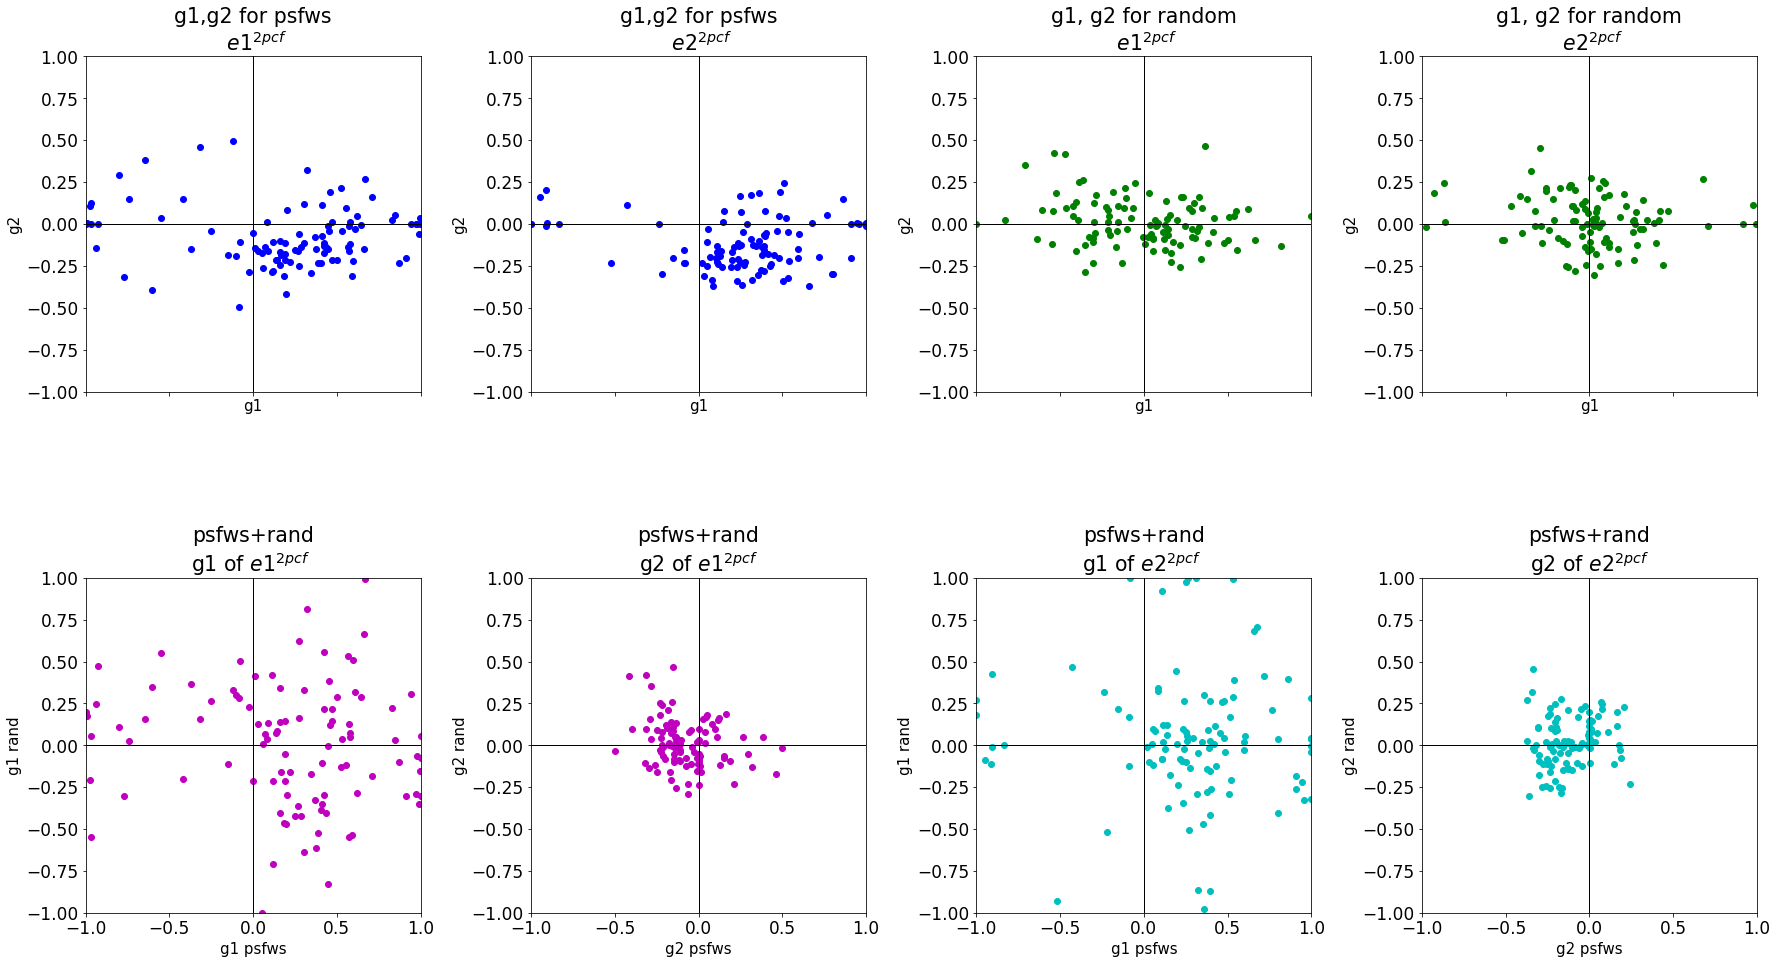

In [14]:
# Plot ellipticities of the correlation functions

fig, ax = plt.subplots(2,4, figsize=(25,15),sharex=True)
# e1, e2 scatter psfws
(ax[0,0],ax[0,1]) = plotplot([ax[0,0],ax[0,1]],[eP['e1_g1'], eP["e1_g2"]],[eP['e2_g1'], eP["e2_g2"]],
         "g1,g2 for psfws", 
         [" $e1^{2pcf}$"," $e2^{2pcf}$"], "b", ["g1","g2"])

# e1, e2 scatter rand
(ax[0,2],ax[0,3]) = plotplot([ax[0,2],ax[0,3]],[eR['e1_g1'], eR["e1_g2"]],[eR['e2_g1'], eR["e2_g2"]],
         "g1, g2 for random", 
         [" $e1^{2pcf}$"," $e2^{2pcf}$"],"g", ["g1","g2"]) 

# e1 scatter psfws + rand
(ax[1,0],ax[1,1])  = plotplot([ax[1,0],ax[1,1]], [eP['e1_g1'], eR["e1_g1"]],[eP['e1_g2'], eR["e1_g2"]],
         "psfws+rand", 
         ["g1 of $e1^{2pcf}$  ","g2 of $e1^{2pcf}$ "],"m", ["g1","g2"])

# e2 scatter psfws + rand
(ax[1,2],ax[1,3]) = plotplot([ax[1,2],ax[1,3]],[eP['e2_g1'], eR["e2_g1"]],[eP['e2_g2'], eR["e2_g2"]],
         "psfws+rand", 
         ["g1 of $e2^{2pcf}$  ","g2 of $e2^{2pcf}$ "],"c", ["g1","g2"])

[a.set_xlabel("g1 psfws") for a in [ax[1,0],ax[1,2]]]
[a.set_ylabel("g1 rand") for a in [ax[1,0],ax[1,2]]]
[a.set_xlabel("g2 psfws") for a in [ax[1,1],ax[1,3]]]
[a.set_ylabel("g2 rand") for a in [ax[1,1],ax[1,3]]]
fig.tight_layout()

In [21]:
eP["e1_phiP"] = [get_theta(eP["e1_g2"][i],eP["e1_g1"][i]) for i in range(len(eP["e1_g2"]))]
eP['e2_phiP'] = [get_theta(eP["e2_g2"][i],eP["e2_g1"][i]) for i in range(len(eP["e2_g1"]))]
eR['e1_phiR'] = [get_theta(eR["e1_g2"][i],eR["e1_g1"][i]) for i in range(len(eP["e1_g1"]))]
eR['e2_phiR'] = [get_theta(eR["e2_g2"][i],eR["e2_g1"][i]) for i in range(len(eP["e2_g1"]))]


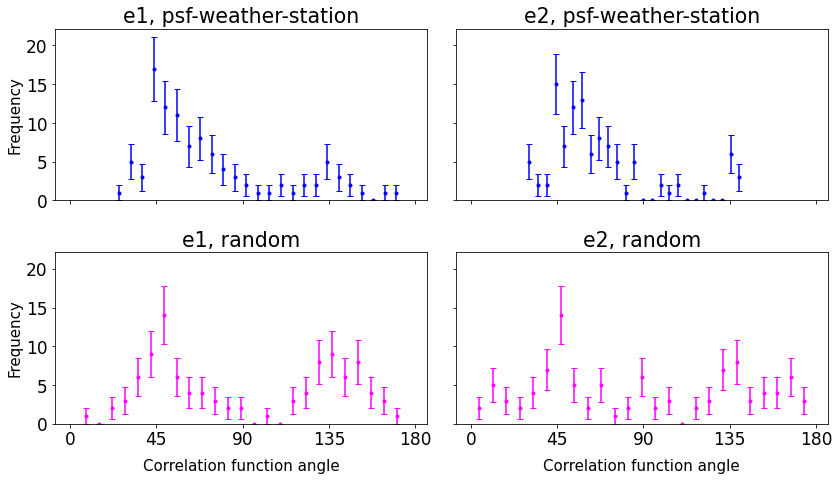

In [23]:

things = [eP["e1_phiP"], eP['e2_phiP'], eR['e1_phiR'], eR['e2_phiR']]
fig,ax =plt.subplots(2,2,figsize=(12,7), sharey=True, sharex=True)

ax[0,0] = plothist(ax[0,0], things[0], "b")
ax[0,1] = plothist(ax[0,1], things[1], "b")
ax[1,0] = plothist(ax[1,0], things[2], "magenta")
ax[1,1] = plothist(ax[1,1], things[3], "magenta")

ax[0,0].set_title("e1, psf-weather-station")
ax[0,1].set_title("e2, psf-weather-station")
ax[1,0].set_title("e1, random")
ax[1,1].set_title("e2, random")

[a.set_xlabel("Correlation function angle", labelpad=10) for a in ax[1]]
ax[0,0].set_ylabel("Frequency")
ax[1,0].set_ylabel("Frequency")
ax[0,0].set_xticks(np.linspace(0,180,5))

fig.tight_layout()